In [205]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [207]:
# Tentukan path file dataset di Google Drive
path = '/content/drive/My Drive/Dataset/production_based_co2_emissions.csv'

# Baca dataset menggunakan pandas
emi = pd.read_csv(path)

# Tampilkan beberapa baris pertama dari dataset
emi

,ISO3,Country,Continent,Hemisphere,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013),Metric tons of CO2e per capita (2018)
0,AFG,Afghanistan,Asia,Northern Hemisphere,1.24,0.84,0.82,0.76,1.06,1.40,2.66
1,ALB,Albania,Europe,Northern Hemisphere,3.56,2.15,2.36,2.68,2.83,2.85,3.52
2,DZA,Algeria,Africa,Northern Hemisphere,3.50,3.42,3.75,4.04,4.58,4.88,5.18
3,AGO,Angola,Africa,Southern Hemisphere,4.29,4.43,4.20,5.06,6.32,5.99,2.59
4,ATG,Antigua and Barbuda,America,Northern Hemisphere,6.31,6.53,7.08,8.77,10.69,11.22,12.59
...,...,...,...,...,...,...,...,...,...,...,...
176,VEN,Venezuela,America,Northern Hemisphere,8.62,8.73,8.70,8.85,9.08,8.85,8.10
177,VNM,Vietnam,Asia,Northern Hemisphere,1.03,1.25,1.63,2.16,2.80,2.81,3.94
178,YEM,Yemen,Asia,Northern Hemisphere,0.99,1.00,1.15,1.33,1.41,1.39,0.76
179,ZMB,Zambia,Africa,Southern Hemisphere,5.18,4.20,3.36,3.58,3.31,3.31,2.34


In [208]:
emi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ISO3                                   181 non-null    object 
 1   Country                                181 non-null    object 
 2   Continent                              181 non-null    object 
 3   Hemisphere                             181 non-null    object 
 4   Metric tons of CO2e per capita (1990)  154 non-null    float64
 5   Metric tons of CO2e per capita (1995)  177 non-null    float64
 6   Metric tons of CO2e per capita (2000)  179 non-null    float64
 7   Metric tons of CO2e per capita (2005)  179 non-null    float64
 8   Metric tons of CO2e per capita (2010)  181 non-null    float64
 9   Metric tons of CO2e per capita (2013)  180 non-null    float64
 10  Metric tons of CO2e per capita (2018)  180 non-null    float64
dtypes: flo

In [209]:
#cek deskripsi statistik
emi.describe()

,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013),Metric tons of CO2e per capita (2018)
count,154.000000,177.000000,179.000000,179.000000,181.000000,180.000000,180.000000
mean,6.556169,6.868023,7.049832,7.408603,7.226464,7.136833,6.794833
std,7.932022,8.815395,8.637687,9.340650,8.239457,7.900280,6.556862
min,0.420000,0.420000,0.350000,0.260000,0.290000,0.320000,0.490000
25%,1.467500,1.690000,1.760000,1.905000,1.960000,1.917500,2.340000
50%,3.450000,4.040000,4.380000,4.570000,4.730000,4.875000,4.870000
75%,8.615000,8.690000,8.845000,9.485000,9.300000,9.067500,8.577500
max,48.330000,73.130000,65.640000,76.410000,62.470000,54.410000,38.750000


In [210]:
# Replace NaN values with 0 in the specified columns
emi['Metric tons of CO2e per capita (1990)'].fillna(0, inplace=True)
emi['Metric tons of CO2e per capita (1995)'].fillna(0, inplace=True)
emi['Metric tons of CO2e per capita (2000)'].fillna(0, inplace=True)
emi['Metric tons of CO2e per capita (2005)'].fillna(0, inplace=True)
emi['Metric tons of CO2e per capita (2010)'].fillna(0, inplace=True)
emi['Metric tons of CO2e per capita (2013)'].fillna(0, inplace=True)
emi['Metric tons of CO2e per capita (2018)'].fillna(0, inplace=True)

In [211]:
# Counting the number of 0 values for each column
col_1990 = (emi['Metric tons of CO2e per capita (1990)'] == 0).sum()
col_1995 = (emi['Metric tons of CO2e per capita (1995)'] == 0).sum()
col_2000 = (emi['Metric tons of CO2e per capita (2000)'] == 0).sum()
col_2005 = (emi['Metric tons of CO2e per capita (2005)'] == 0).sum()
col_2010 = (emi['Metric tons of CO2e per capita (2010)'] == 0).sum()
col_2013 = (emi['Metric tons of CO2e per capita (2013)'] == 0).sum()
col_2018 = (emi['Metric tons of CO2e per capita (2018)'] == 0).sum()

# Printing the results
print("Number of 0 values in 1990 column:", col_1990)
print("Number of 0 values in 1995 column:", col_1995)
print("Number of 0 values in 2000 column:", col_2000)
print("Number of 0 values in 2005 column:", col_2005)
print("Number of 0 values in 2010 column:", col_2010)
print("Number of 0 values in 2013 column:", col_2013)
print("Number of 0 values in 2018 column:", col_2018)

Number of 0 values in 1990 column: 27
Number of 0 values in 1995 column: 4
Number of 0 values in 2000 column: 2
Number of 0 values in 2005 column: 2
Number of 0 values in 2010 column: 0
Number of 0 values in 2013 column: 1
Number of 0 values in 2018 column: 1


In [212]:
emi.loc[(emi['Metric tons of CO2e per capita (1990)']==0)]

,ISO3,Country,Continent,Hemisphere,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013),Metric tons of CO2e per capita (2018)
6,ARM,Armenia,Asia,Northern Hemisphere,0.0,1.94,1.82,2.30,2.46,2.97,3.17
9,AZE,Azerbaijan,Asia,Northern Hemisphere,0.0,7.50,6.79,6.61,6.36,7.43,8.07
14,BLR,Belarus,Europe,Northern Hemisphere,0.0,8.23,7.84,8.63,9.66,9.55,9.29
15,BEL,Belgium,Europe,Northern Hemisphere,0.0,0.00,13.26,12.16,11.44,10.17,9.52
20,BIH,Bosnia and Herzegovina,Europe,Northern Hemisphere,0.0,1.81,5.34,6.00,7.36,7.89,8.18
38,HRV,Croatia,Europe,Northern Hemisphere,0.0,4.64,5.41,6.40,5.99,5.49,5.52
41,CZE,Czech Republic,Europe,Northern Hemisphere,0.0,14.05,13.76,13.47,12.39,11.42,11.56
50,ERI,Eritrea,Africa,Northern Hemisphere,0.0,1.96,1.95,1.63,1.44,1.44,0.00
51,EST,Estonia,Europe,Northern Hemisphere,0.0,14.40,13.53,15.77,17.30,17.66,14.07
53,ETH,Ethiopia,Africa,Northern Hemisphere,0.0,1.11,1.09,1.16,1.31,1.30,1.58


In [213]:
#Melakukan Drop baris dengan nilai 'x', 'y', dan 'z' = 0
emi = emi.loc[(emi[['Metric tons of CO2e per capita (1990)','Metric tons of CO2e per capita (1995)','Metric tons of CO2e per capita (2000)','Metric tons of CO2e per capita (2005)','Metric tons of CO2e per capita (2010)','Metric tons of CO2e per capita (2013)','Metric tons of CO2e per capita (2018)']]!=0).all(axis=1)]

#cek ukuran data untuk memastikan baris sudah di-drop atau belum
emi.shape

(153, 11)

In [214]:
#melakukan pengecekan kembali adakah nilai 0 pada data
emi.describe()

,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013),Metric tons of CO2e per capita (2018)
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,6.573987,6.852418,6.977190,7.238366,7.014771,6.862484,6.470980
std,7.954979,9.313236,9.111979,9.775051,8.599781,8.181023,6.711672
min,0.420000,0.420000,0.350000,0.260000,0.290000,0.320000,0.490000
25%,1.450000,1.670000,1.640000,1.790000,1.820000,1.820000,2.230000
50%,3.400000,3.500000,3.850000,4.130000,4.260000,4.050000,4.050000
75%,8.620000,8.390000,8.700000,9.230000,9.030000,8.850000,8.020000
max,48.330000,73.130000,65.640000,76.410000,62.470000,54.410000,38.750000


<Axes: xlabel='Metric tons of CO2e per capita (1990)'>

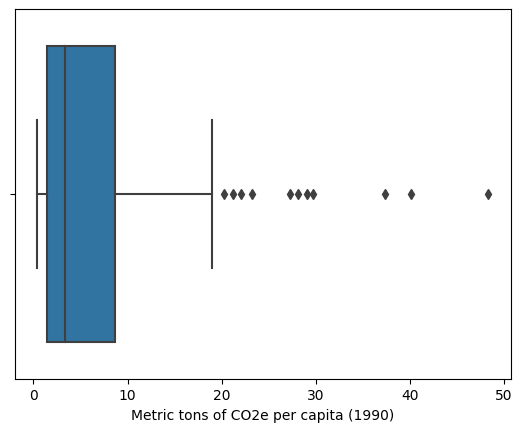

In [215]:
#Membuat box plot untuk distribusi variabel 'Metric tons of CO2e per capita (1990)'
sns.boxplot(x=emi['Metric tons of CO2e per capita (1990)'])

<Axes: xlabel='Metric tons of CO2e per capita (1995)'>

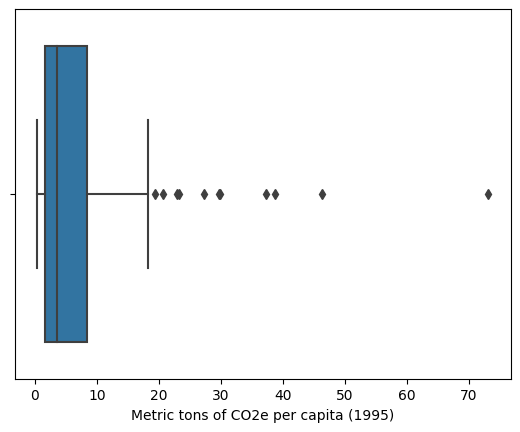

In [216]:
#Membuat box plot untuk distribusi variabel 'Metric tons of CO2e per capita (1995)'
sns.boxplot(x=emi['Metric tons of CO2e per capita (1995)'])

<Axes: xlabel='Metric tons of CO2e per capita (2000)'>

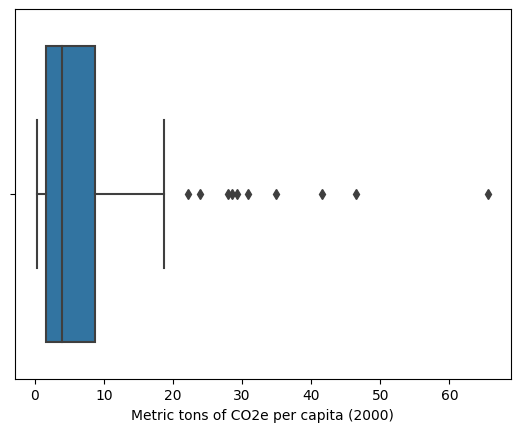

In [217]:
#Membuat box plot untuk distribusi variabel 'Metric tons of CO2e per capita (2000)'
sns.boxplot(x=emi['Metric tons of CO2e per capita (2000)'])

<Axes: xlabel='Metric tons of CO2e per capita (2005)'>

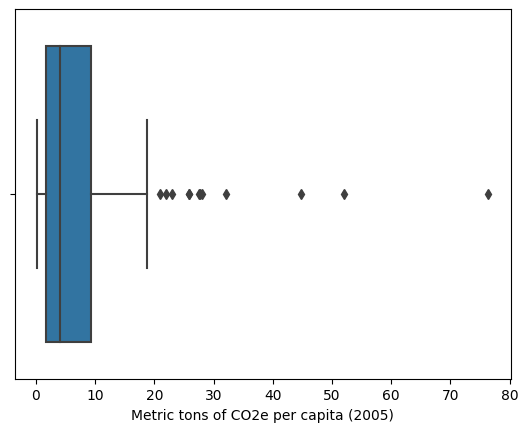

In [218]:
#Membuat box plot untuk distribusi variabel 'Metric tons of CO2e per capita (2005)'
sns.boxplot(x=emi['Metric tons of CO2e per capita (2005)'])

<Axes: xlabel='Metric tons of CO2e per capita (2010)'>

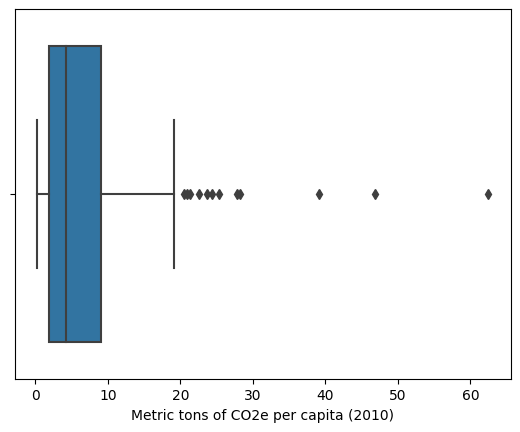

In [219]:
#Membuat box plot untuk distribusi variabel 'Metric tons of CO2e per capita (2010)'
sns.boxplot(x=emi['Metric tons of CO2e per capita (2010)'])

<Axes: xlabel='Metric tons of CO2e per capita (2013)'>

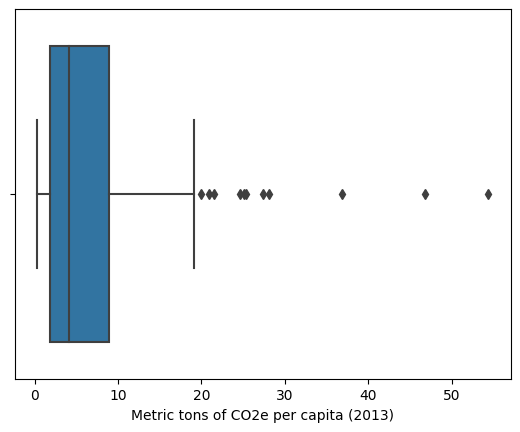

In [220]:
#Membuat box plot untuk distribusi variabel 'Metric tons of CO2e per capita (2013)'
sns.boxplot(x=emi['Metric tons of CO2e per capita (2013)'])

<Axes: xlabel='Metric tons of CO2e per capita (2018)'>

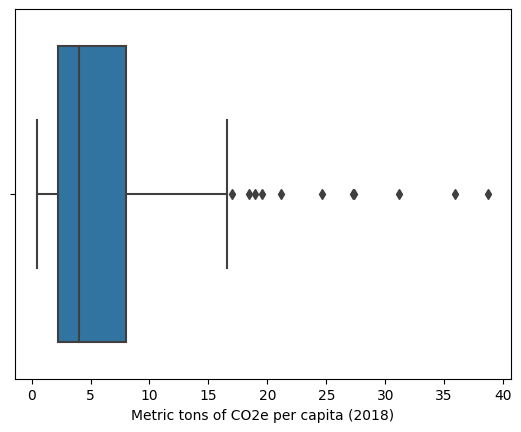

In [221]:
#Membuat box plot untuk distribusi variabel 'Metric tons of CO2e per capita (2018)'
sns.boxplot(x=emi['Metric tons of CO2e per capita (2018)'])

In [222]:
# Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan Interquartile Range (IQR)
Q1 = emi.quantile(0.25)
Q3 = emi.quantile(0.75)
IQR=Q3-Q1
emi=emi[~((emi<(Q1-1.5*IQR))|(emi>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
emi.shape

<ipython-input-222-3b90b1c47a74>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = emi.quantile(0.25)
<ipython-input-222-3b90b1c47a74>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = emi.quantile(0.75)
<ipython-input-222-3b90b1c47a74>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  emi=emi[~((emi<(Q1-1.5*IQR))|(emi>(Q3+1.5*IQR))).any(axis=1)]


(139, 11)

<Axes: xlabel='Metric tons of CO2e per capita (2000)'>

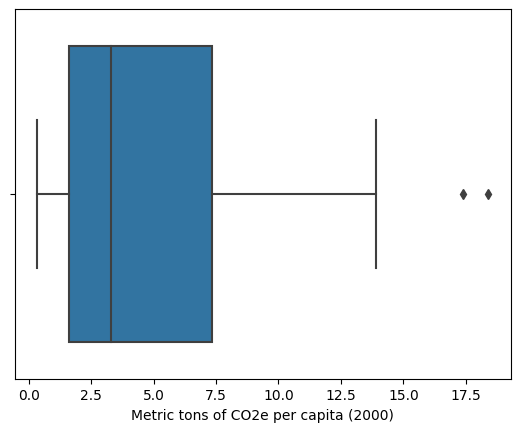

In [223]:
#tes lihat satu visualisasi boxplot
sns.boxplot(x=emi['Metric tons of CO2e per capita (2000)'])

In [224]:
# Mendefinisikan fitur-fitur numerik dan kategorikal dalam dataset
numerical_features = ['Metric tons of CO2e per capita (1990)', 'Metric tons of CO2e per capita (1995)',
                       'Metric tons of CO2e per capita (2000)', 'Metric tons of CO2e per capita (2005)',
                       'Metric tons of CO2e per capita (2010)', 'Metric tons of CO2e per capita (2013)',
                       'Metric tons of CO2e per capita (2018)']

categorical_features = ['Continent', 'Hemisphere']

         jumlah sampel  persentase
Africa              46        33.1
Asia                31        22.3
America             31        22.3
Europe              22        15.8
Oceania              9         6.5


<Axes: title={'center': 'Continent'}>

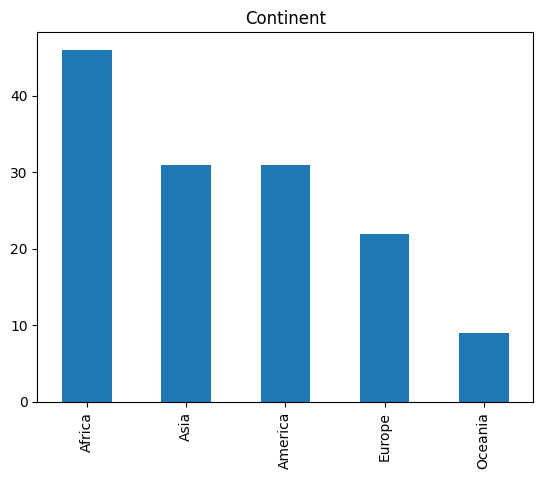

In [225]:
#Analisis dan visualisasi fitur kategorikal 'Continent'
feature = categorical_features[0]
count = emi[feature].value_counts()
percent = 100*emi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

                     jumlah sampel  persentase
Northern Hemisphere            103        74.1
Southern Hemisphere             36        25.9


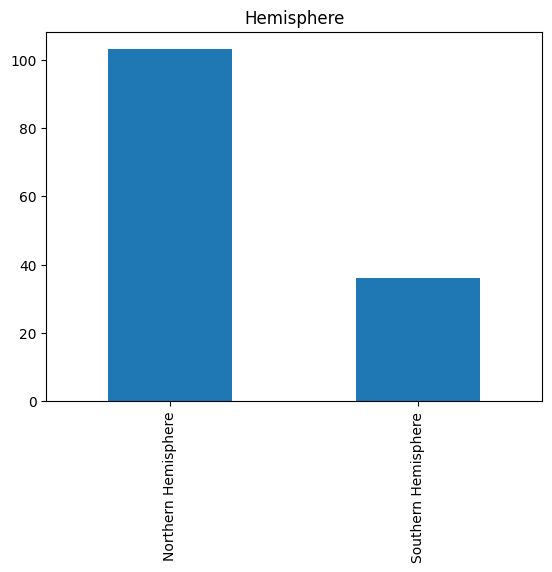

In [226]:
# Menampilkan data untuk fitur 'Hemisphere'
feature = categorical_features[1]
count = emi[feature].value_counts()
percent = 100 * emi[feature].value_counts(normalize=True)
df_counts = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_counts)

# Generate a bar plot for the 'Hemisphere' feature
count.plot(kind='bar', title=feature)
plt.show()

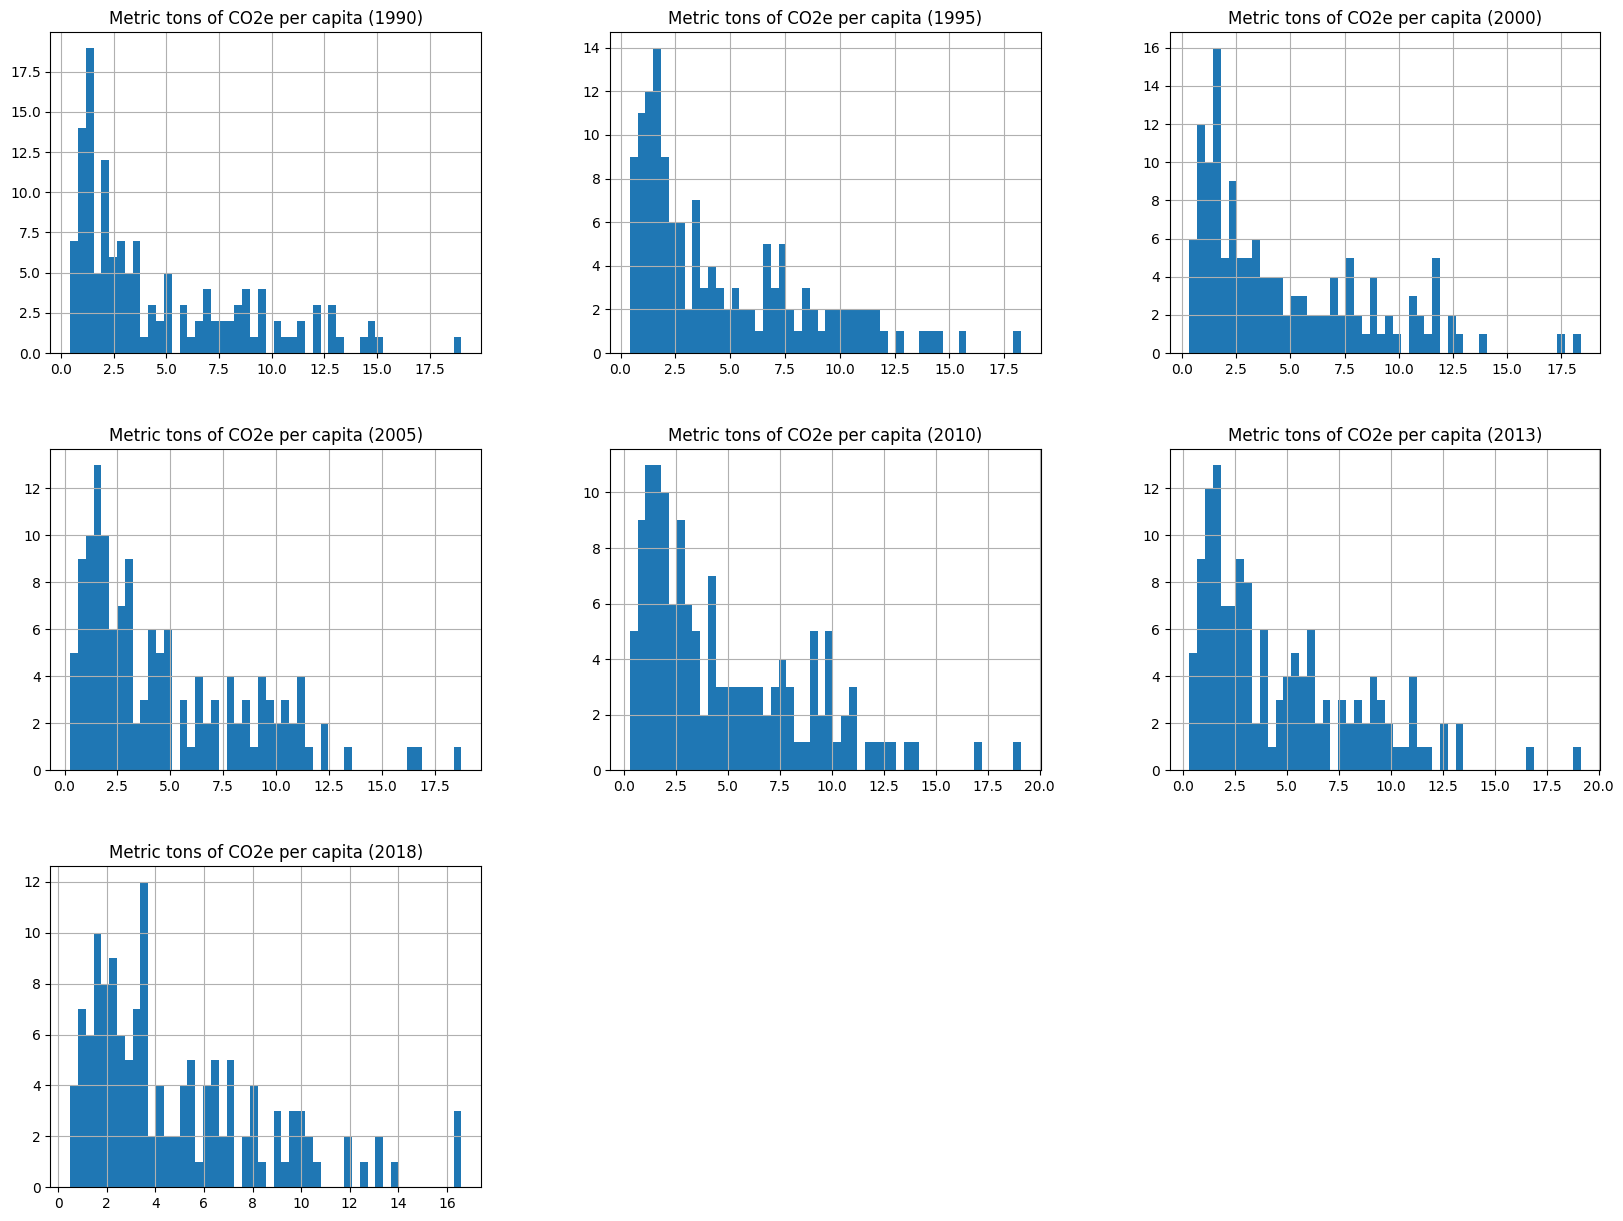

In [227]:
# Membuat histogram untuk distribusi variabel dalam dataset 'Co2 Emissions'
emi.hist(bins=50, figsize=(20,15))
plt.show()

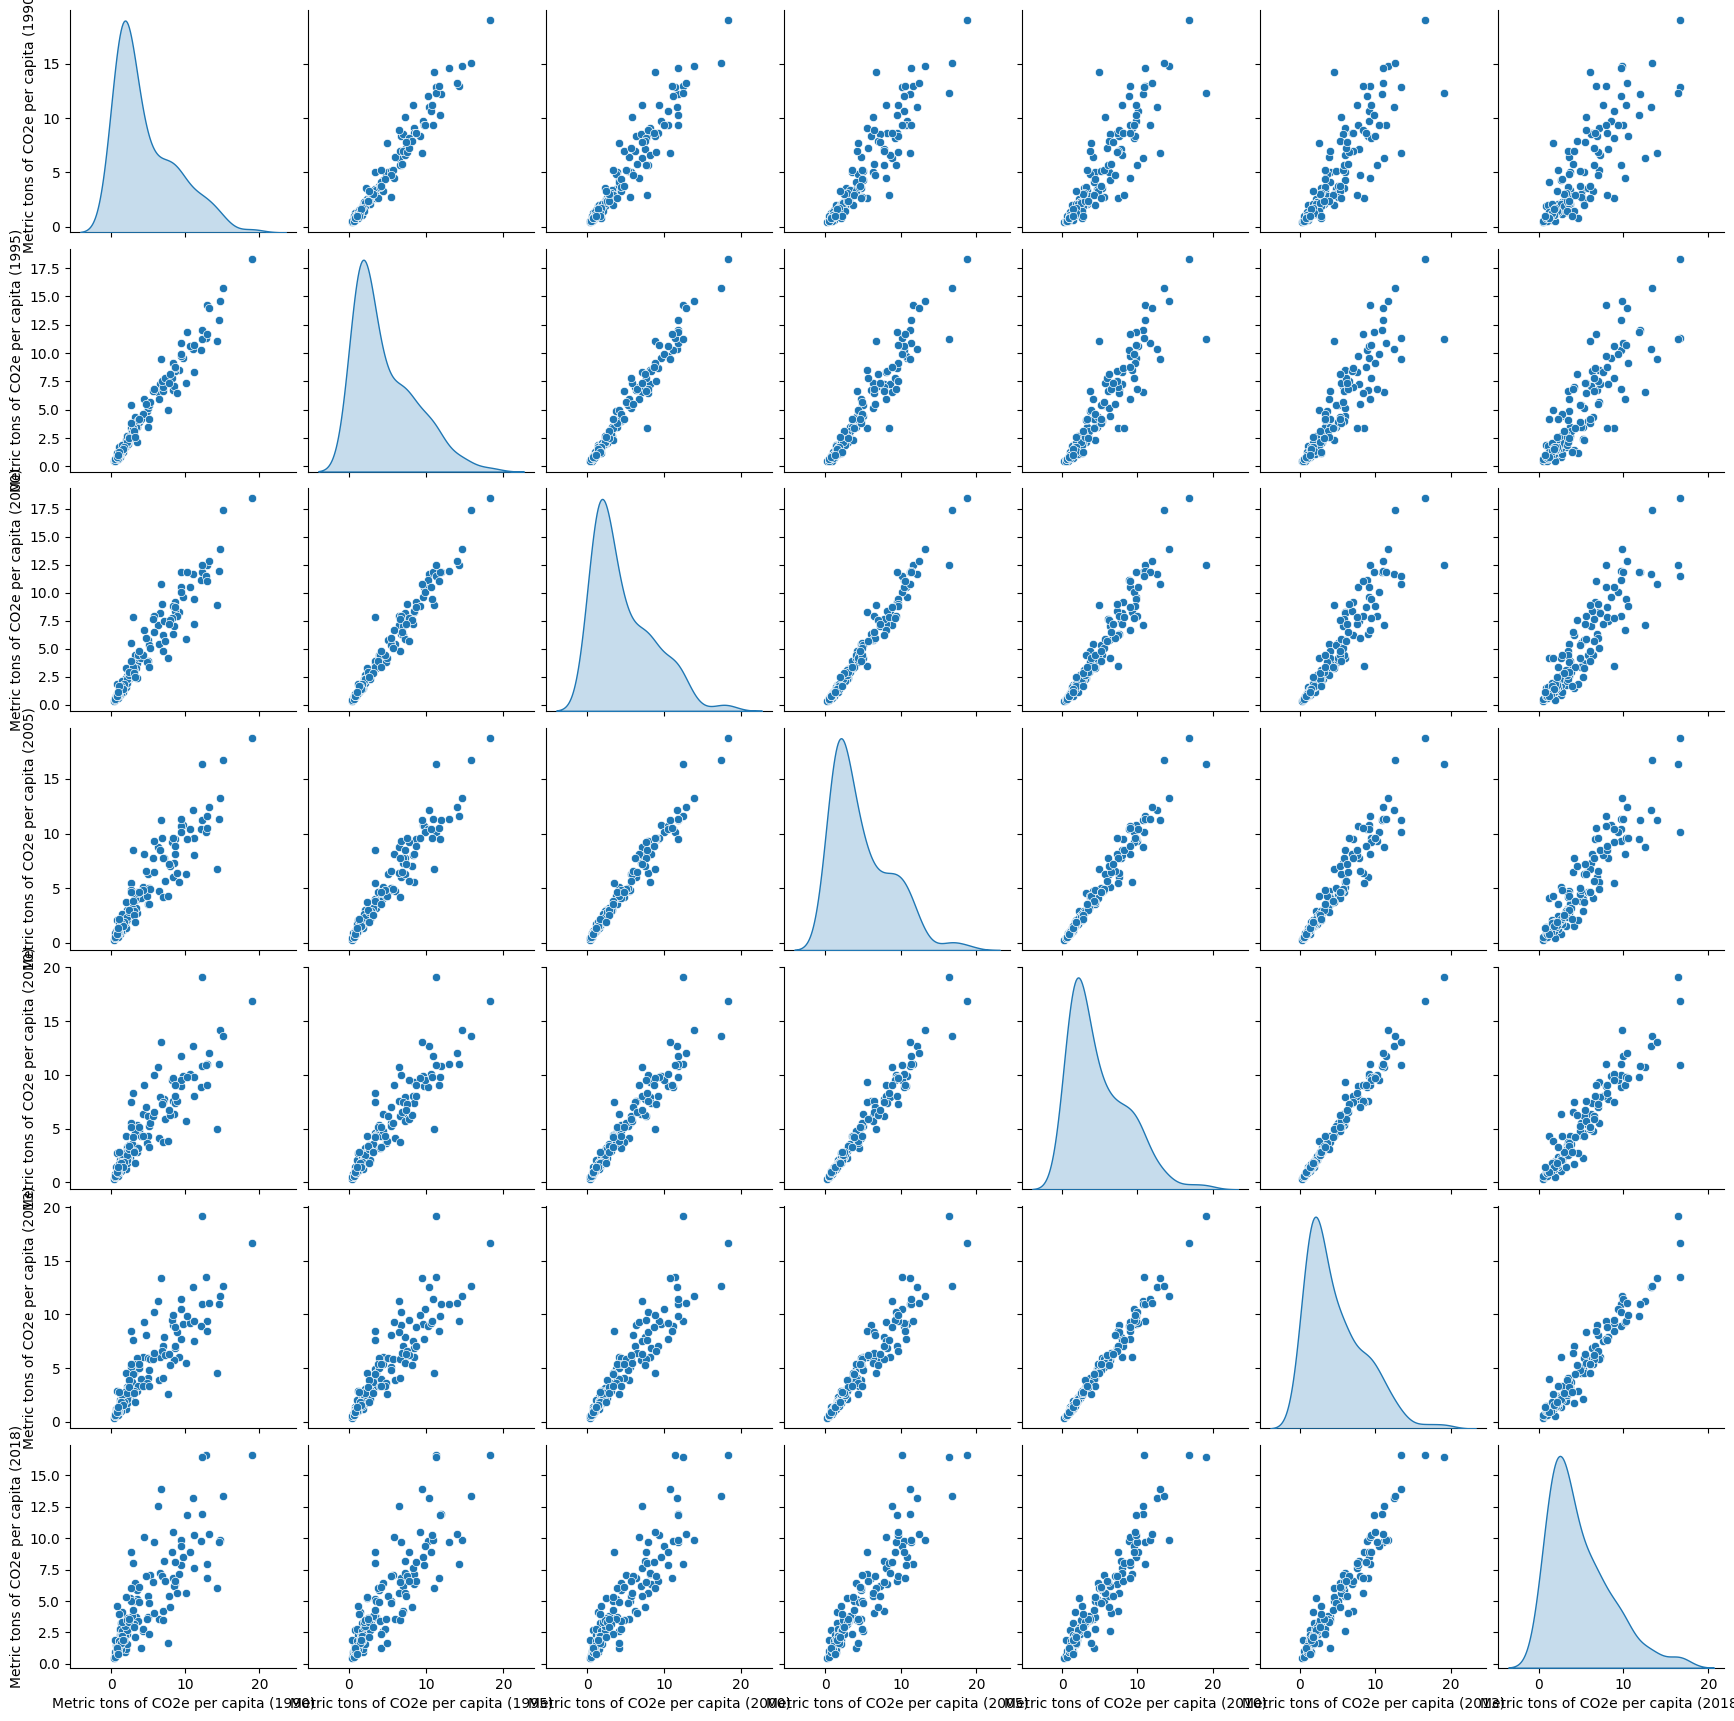

In [228]:
#Menggunakan pairplot untuk memvisualisasikan hubungan antara fitur numerik
sns.pairplot(emi, diag_kind = 'kde')

<ipython-input-229-9c9e03252690>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = emi.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

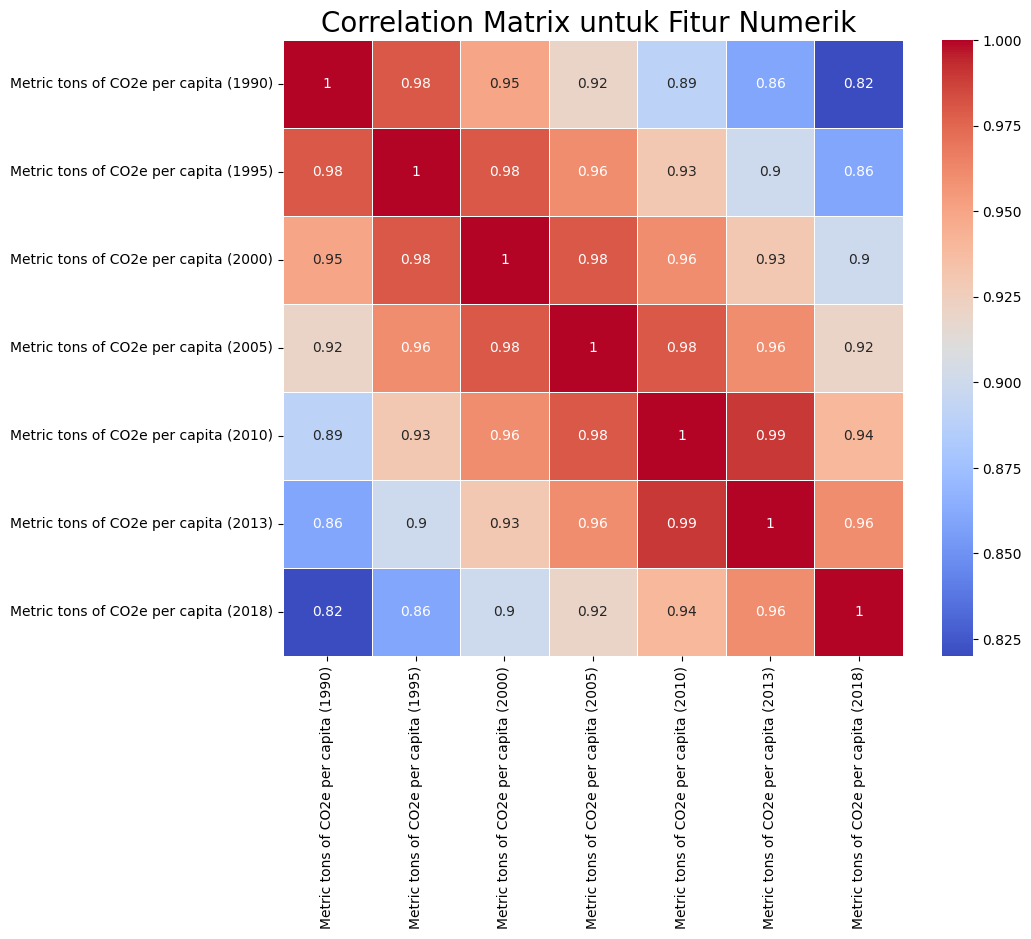

In [229]:
#Mengevaluasi korelasi antar fitur numerik menggunakan matriks korelasi dan heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = emi.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [231]:
#Inisialisasi atribut dan target
X = emi[['Metric tons of CO2e per capita (1990)', 'Metric tons of CO2e per capita (1995)',
                       'Metric tons of CO2e per capita (2000)', 'Metric tons of CO2e per capita (2005)',
                       'Metric tons of CO2e per capita (2010)', 'Metric tons of CO2e per capita (2013)']]
y = emi['Metric tons of CO2e per capita (2018)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [232]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in whole dataset: {len(X_train)}')
print(f'Total # of sample in whole dataset: {len(X_test)}')

Total # of sample in whole dataset: 139
Total # of sample in whole dataset: 125
Total # of sample in whole dataset: 14


In [233]:
# Standardisasi menggunakan StandardScaler pada data latih
from sklearn.preprocessing import StandardScaler

# Menentukan fitur-fitur numerik yang akan distandardisasi
numerical_features = ['Metric tons of CO2e per capita (1990)', 'Metric tons of CO2e per capita (1995)',
                       'Metric tons of CO2e per capita (2000)', 'Metric tons of CO2e per capita (2005)',
                       'Metric tons of CO2e per capita (2010)', 'Metric tons of CO2e per capita (2013)']

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan fitting pada data latih untuk menghitung mean dan standard deviation
scaler.fit(X_train[numerical_features])

# Melakukan transformasi pada data latih
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

# Menampilkan lima baris pertama dari fitur-fitur numerik setelah standarisasi
X_train[numerical_features].head()

,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013)
58,-0.182168,-0.163513,-0.170261,-0.191267,-0.164783,-0.203849
153,-0.847820,-0.850312,-0.793728,-0.775192,-0.800583,-0.772330
39,0.042908,-0.338334,-0.232608,-0.339128,-0.146764,-0.187985
149,-0.893314,-0.937722,-0.955830,-0.980694,-1.001362,-1.005011
12,-0.967541,-0.992666,-1.000720,-1.013273,-1.003936,-0.991790


In [234]:
# Menampilkan statistik deskriptif untuk fitur-fitur numerik dalam X_train
X_train[numerical_features].describe().round(4)

,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013)
count,125.0000,125.0000,125.0000,125.0000,125.0000,125.0000
mean,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0040,1.0040,1.0040,1.0040,1.0040,1.0040
min,-1.0585,-1.0901,-1.1154,-1.1611,-1.1867,-1.1822
25%,-0.8287,-0.8153,-0.8037,-0.7977,-0.8006,-0.7988
50%,-0.4216,-0.3508,-0.3648,-0.3291,-0.3192,-0.2990
75%,0.7014,0.6307,0.6926,0.7185,0.6744,0.5577
max,3.3927,3.3679,3.3860,3.4777,3.6577,3.7967


In [235]:
#Membuat DataFrame untuk menyimpan hasil evaluasi model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [236]:
# Inisialisasi model KNN dengan 10 tetangga terdekat
knn = KNeighborsRegressor(n_neighbors=10)

# Melatih model KNN pada data latih
knn.fit(X_train, y_train)

# Membuat prediksi terhadap data latih
y_pred_knn = knn.predict(X_train)

In [237]:
#Inisialisasi model Random Forest Regressor dengan hyperparameters tertentu
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)

#Melatih model Random Forest pada data latih
RF.fit(X_train, y_train)

#Menghitung dan menyimpan nilai MSE pada data latih
models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [238]:
#Inisialisasi model Boosting dengan hyperparameters tertentu
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)

#Melatih model Boosting pada data latih
boosting.fit(X_train, y_train)

#Menghitung dan menyimpan nilai MSE pada data latih
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [239]:
#Scaling data uji
# Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [240]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.001437,0.002558
RF,0.000137,0.002282
Boosting,0.000498,0.001801


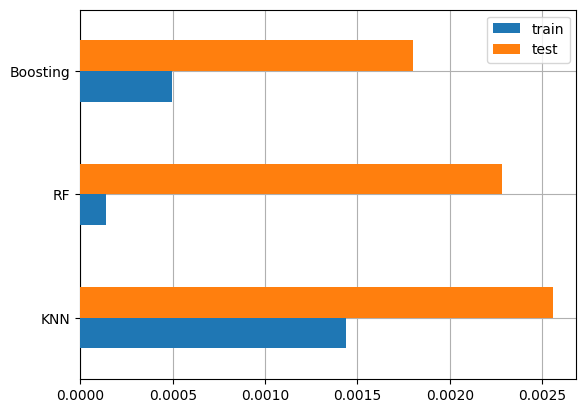

In [241]:
# Membuat diagram batang horizontal dari nilai Mean Squared Error yang diurutkan berdasarkan data uji.
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [242]:
#Uji model dengan data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
132,1.79,2.2,2.0,2.0
